In [7]:
import numpy as np
import matplotlib.pyplot as plt


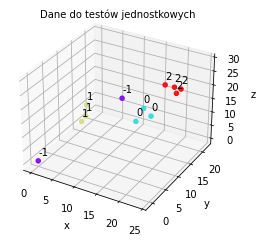

In [10]:
#Model plots of 3D groups

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = 22, 23, 24, 3, 4, 5, 20, 18, 19, 21, 0, 10
ydata = 0, 1, 2, 13, 11, 8, 19, 18, 20, 19, 0, 15
zdata = 25, 29, 26, 11, 9, 10, 18, 21, 19, 20, 0, 15
c = 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, -1, -1,
cdata = []
for i in range(0, len(c)):
    cdata.append(c[i]* 8 + 10)
plot_points = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='rainbow', alpha=.9)
for i in range(0, len(c)):
    ax.text(xdata[i],ydata[i], zdata[i] + 2, c[i],)
ax.text2D(0.15, 0.95, "Dane do testów jednostkowych", transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.ylim([-2, 23])

plt.savefig('plots/test_data_1_plot.pdf')


In [11]:
# Get array of 3D points

xdata = 22, 23, 24, 3, 4, 5, 20, 18, 19, 21, 0, 10
ydata = 0, 1, 2, 13, 11, 8, 19, 18, 20, 19, 0, 15
zdata = 25, 29, 26, 11, 9, 10, 18, 21, 19, 20, 0, 15
data_array = []
for i in range(0, len(zdata)):
    #single_point = [xdata[i], ydata[i], zdata[i]]
    data_array.append([xdata[i], ydata[i], zdata[i]])
data_array


[[22, 0, 25],
 [23, 1, 29],
 [24, 2, 26],
 [3, 13, 11],
 [4, 11, 9],
 [5, 8, 10],
 [20, 19, 18],
 [18, 18, 21],
 [19, 20, 19],
 [21, 19, 20],
 [0, 0, 0],
 [10, 15, 15]]

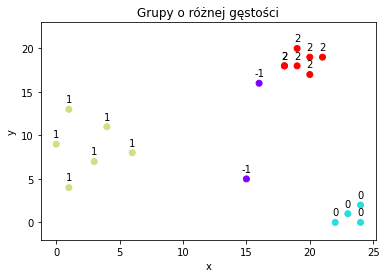

In [12]:
# Plots for model groups with different density

fig = plt.figure()

xdata = 22, 23, 24, 1, 4, 6, 3, 20, 18, 19, 21, 15, 16, 0, 1, 19, 20, 18, 24
ydata = 0, 1, 2, 13, 11, 8, 7, 19, 18, 20, 19, 5, 16, 9, 4, 18, 17, 18, 0
c = 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, -1, -1, 1, 1, 2, 2, 2, 0
cdata = []
for i in range(0, len(c)):
    cdata.append(c[i]* 5 + 10)

plt.scatter(xdata, ydata, c=cdata, cmap='rainbow')
plt.title('Grupy o różnej gęstości')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 23])
for i in range(0, len(c)):
    plt.annotate(c[i], # this is the text
                 (xdata[i],ydata[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center')
plt.savefig('plots/test_data_2_plot.pdf')





Point 0 is in group 0

Point 1 is in group 0

Point 2 is in group 0

Point 7 is in group 1

Point 8 is in group 1

Point 9 is in group 1

Point 10 is in group 1

Point 11 is in group -1

Point 12 is in group 1

Point 15 is in group 1

Point 16 is in group 1

Point 17 is in group 1

Point 18 is in group 0

Point 3 is in group 2

Point 4 is in group 2

Point 5 is in group 2

Point 6 is in group 2

Point 13 is in group 2

Point 14 is in group 2

Point 0 is in group 0

Point 1 is in group 0

Point 2 is in group 0

Point 7 is in group 1

Point 8 is in group 1

Point 9 is in group 1

Point 10 is in group 1

Point 11 is in group -1

Point 12 is in group 1

Point 15 is in group 1

Point 16 is in group 1

Point 17 is in group 1

Point 18 is in group 0

Point 3 is in group 2

Point 4 is in group 2

Point 5 is in group 2

Point 6 is in group 2

Point 13 is in group 2

Point 14 is in group 2



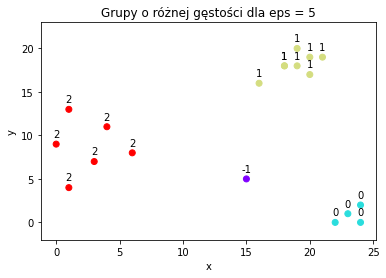

In [32]:
#from algorythm_tidbscan import algorythm_tidbscan as ti
#from algorythm_swdbscan_improved import algorythm_swdbscan as sw
from algorythm_swdbscan import algorythm_swdbscan as sw

# Plots for groups with different density compute with TiDbscan

xdata = 22, 23, 24, 1, 4, 6, 3, 20, 18, 19, 21, 15, 16, 0, 1, 19, 20, 18, 24
ydata = 0, 1, 2, 13, 11, 8, 7, 19, 18, 20, 19, 5, 16, 9, 4, 18, 17, 18, 0
array = []
eps = 5
for i in range(0, len(xdata)):
    array_inner = []
    array_inner.append(xdata[i])
    array_inner.append(ydata[i])
    array.append(array_inner)
data_array_diffrent_density = np.array(array)
data_base_different_density = sw(4, eps, data_array_diffrent_density)
#data_base_different_density = ti(4, eps, data_array_diffrent_density, 0)

xdata_ti = []
ydata_ti = []
c = []
for point in data_base_different_density:
    xdata_ti.append(point.coordinates[0])
    ydata_ti.append(point.coordinates[1])
    c.append(point.label[0])
cdata = []
for i in range(0, len(c)):
    cdata.append(c[i]* 5 + 10)


plt.scatter(xdata_ti, ydata_ti, c=cdata, cmap='rainbow')
plt.title('Grupy o różnej gęstości dla eps = ' + str(eps))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2, 23])

for i in range(0, len(c)):
    plt.annotate(c[i], # this is the text
                 (xdata_ti[i],ydata_ti[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center')

file_name = 'plots/sw_not_improved_test_density_data_plot' + '_eps_' + str(eps) + '.pdf'
#file_name = 'plots/test_data_plot' + '_eps_' + str(eps) + '.pdf'
plt.savefig(file_name)


Point 0 is in group -1

Point 1 is in group -1

Point 7 is in group 0

Point 8 is in group 0

Point 9 is in group 0

Point 10 is in group 0

Point 13 is in group 0

Point 14 is in group 0

Point 3 is in group 1

Point 4 is in group 1

Point 5 is in group 1

Point 6 is in group 1

Point 12 is in group 1

Point 15 is in group -1

Point 0 is in group -1

Point 7 is in group 0

Point 8 is in group 0

Point 9 is in group 0

Point 10 is in group 0

Point 13 is in group 0

Point 14 is in group 0

Point 15 is in group -1

Point 3 is in group 1

Point 4 is in group 1

Point 5 is in group 1

Point 6 is in group 1

Point 11 is in group UNDEFINED

Point 12 is in group 1

Point 15 is in group -1



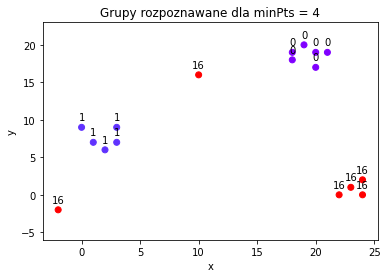

In [33]:
#from algorythm_tidbscan import algorythm_tidbscan as sw
#from algorythm_swdbscan_improved import algorythm_swdbscan as sw
from algorythm_swdbscan import algorythm_swdbscan as sw

# Plots for groups with different density compute with TiDbscan

xdata = 22, 23, 24, 1, 2, 3, 3, 20, 18, 19, 21, -2, 0, 20, 18, 10, 24
ydata = 0, 1, 2, 7, 6, 9, 7, 19, 18, 20, 19, -2, 9, 17, 19, 16, 0
#xdata = 22, 23, 24, 1, 2, 3, 3, 20, 18, 19, 21, 15, 0, 20, 18, 10, 24
#ydata = 0, 1, 2, 7, 6, 9, 7, 19, 18, 20, 19, 5, 9, 17, 19, 16, 0
array = []
eps = 3
minPts = 4
for i in range(0, len(xdata)):
    array_inner = []
    array_inner.append(xdata[i])
    array_inner.append(ydata[i])
    array.append(array_inner)
data_array_diffrent_density = np.array(array)
data_base_different_density = sw(minPts, eps, data_array_diffrent_density)

xdata_ti = []
ydata_ti = []
c = []
for point in data_base_different_density:
    xdata_ti.append(point.coordinates[0])
    ydata_ti.append(point.coordinates[1])
    c.append(point.label[2])
cdata = []
for i in range(0, len(c)):
    cdata.append(c[i]* 5 + 10)


plt.scatter(xdata_ti, ydata_ti, c=cdata, cmap='rainbow')
plt.title('Grupy rozpoznawane dla minPts = ' + str(minPts))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-6, 23])

for i in range(0, len(c)):
    plt.annotate(c[i], # this is the text
                 (xdata_ti[i],ydata_ti[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,7), # distance from text to points (x,y)
                 ha='center')

file_name = 'plots/sw_not_improved_test_displacement_of_group_data_plot' + '_minPts_' + str(minPts) + '_eps_' + str(eps) + '.pdf'
#file_name = 'plots/sw_test_displacement_of_group_data_plot' + '_minPts_' + str(minPts) + '_eps_' + str(eps) + '.pdf'
#file_name = 'plots/sw_not_improved_test_data_plot' + '_minPts_' + str(minPts) + '_eps_' + str(eps) + '.pdf'
#file_name = 'plots/sw_test_data_plot' + '_minPts_' + str(minPts) + '_eps_' + str(eps) + '.pdf'
plt.savefig(file_name)





Point 0 is in group UNDEFINED

Point 1 is in group UNDEFINED

Point 2 is in group UNDEFINED

Point 3 is in group UNDEFINED

Point 4 is in group UNDEFINED

Point 5 is in group UNDEFINED

Point 6 is in group UNDEFINED

Point 7 is in group UNDEFINED

Point 8 is in group UNDEFINED

Point 9 is in group UNDEFINED

Point 10 is in group UNDEFINED

Point 11 is in group UNDEFINED



TypeError: can only concatenate str (not "int") to str

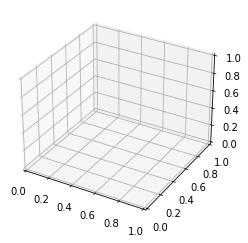

In [15]:
from algorythm_tidbscan import algorythm_tidbscan as ti

# Plots for unit tests of groups compute with TiDbscan

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = 22, 23, 24, 3, 4, 5, 20, 18, 19, 21, 0, 10
ydata = 0, 1, 2, 13, 11, 8, 19, 18, 20, 19, 0, 15
zdata = 25, 29, 26, 11, 9, 10, 18, 21, 19, 20, 0, 15
c = 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, -1, -1,
array = []
minPts = 3
eps = 4
for i in range(0, len(xdata)):
    array_inner = []
    array_inner.append(xdata[i])
    array_inner.append(ydata[i])
    array_inner.append(zdata[i])
    array.append(array_inner)
data_array_diffrent_density = np.array(array)
data_base_different_density = ti(minPts, eps, data_array_diffrent_density, 1)

xdata_ti = []
ydata_ti = []
zdata_ti = []
c = []
for point in data_base_different_density:
    xdata_ti.append(point.coordinates[0])
    ydata_ti.append(point.coordinates[1])
    zdata_ti.append(point.coordinates[2])
    c.append(point.label[0])
cdata = []
for i in range(0, len(c)):
    cdata.append(c[i]* 8 + 10)
plot_points = ax.scatter3D(xdata_ti, ydata_ti, zdata_ti, c=cdata, cmap='rainbow', alpha=.9)
for i in range(0, len(c)):
    ax.text(xdata[i],ydata[i], zdata[i] + 2, c[i],)
ax.text2D(0.15, 0.95, "Test jednostkowy  test\_groups \_minPts_2", transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.ylim([-2, 23])

file_name = 'plots/unit_test_data_plot' + '_minPts_' + str(minPts) + '_eps_' + str(eps) + '.pdf'
plt.savefig(file_name)


